In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegressionCV
import sklearn.metrics as metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import export_graphviz
from IPython.display import Image
from IPython.display import display
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn import discriminant_analysis
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.api import OLS
from sklearn import linear_model, datasets
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
import seaborn.apionly as sns
from scipy import stats
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression

In [2]:
import pandas as pd
df = pd.read_csv('ADNIMERGE_full.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)  
df.head()

,RID,PTID,VISCODE,SITE,COLPROT,ORIGPROT,EXAMDATE,DX_bl,AGE,PTGENDER,PTEDUCAT,PTETHCAT,PTRACCAT,PTMARRY,APOE4,FDG,PIB,AV45,CDRSB,ADAS11,ADAS13,MMSE,RAVLT_immediate,RAVLT_learning,RAVLT_forgetting,RAVLT_perc_forgetting,FAQ,MOCA,EcogPtMem,EcogPtLang,EcogPtVisspat,EcogPtPlan,EcogPtOrgan,EcogPtDivatt,EcogPtTotal,EcogSPMem,EcogSPLang,EcogSPVisspat,EcogSPPlan,EcogSPOrgan,EcogSPDivatt,EcogSPTotal,FLDSTRENG,FSVERSION,Ventricles,Hippocampus,WholeBrain,Entorhinal,Fusiform,MidTemp,ICV,DX,EXAMDATE_bl,CDRSB_bl,ADAS11_bl,ADAS13_bl,MMSE_bl,RAVLT_immediate_bl,RAVLT_learning_bl,RAVLT_forgetting_bl,RAVLT_perc_forgetting_bl,FAQ_bl,FLDSTRENG_bl,FSVERSION_bl,Ventricles_bl,Hippocampus_bl,WholeBrain_bl,Entorhinal_bl,Fusiform_bl,MidTemp_bl,ICV_bl,MOCA_bl,EcogPtMem_bl,EcogPtLang_bl,EcogPtVisspat_bl,EcogPtPlan_bl,EcogPtOrgan_bl,EcogPtDivatt_bl,EcogPtTotal_bl,EcogSPMem_bl,EcogSPLang_bl,EcogSPVisspat_bl,EcogSPPlan_bl,EcogSPOrgan_bl,EcogSPDivatt_bl,EcogSPTotal_bl,FDG_bl,PIB_bl,AV45_bl,Years_bl,Month_bl,Month,M,update_stamp
0,2,011_S_0002,bl,11,ADNI1,ADNI1,9/8/2005,CN,74.3,Male,16,Not Hisp/Latino,White,Married,0.0,1.36926,NaN,NaN,0.0,10.67,18.67,28.0,44.0,4.0,6.0,54.5455,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5 Tesla MRI,Cross-Sectional FreeSurfer (FreeSurfer Version...,118233.0,8336.0,1229740.0,4177.0,16559.0,27936.0,1984660.0,CN,9/8/2005,0.0,10.67,18.67,28,44.0,4.0,6.0,54.5455,0.0,1.5 Tesla MRI,Cross-Sectional FreeSurfer (FreeSurfer Version...,118233.0,8336.0,1229740.0,4177.0,16559.0,27936.0,1984660.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.36926,NaN,NaN,0.000000,0.00000,0,0,50:48.0
1,3,011_S_0003,bl,11,ADNI1,ADNI1,9/12/2005,AD,81.3,Male,18,Not Hisp/Latino,White,Married,1.0,1.09079,NaN,NaN,4.5,22.00,31.00,20.0,22.0,1.0,4.0,100.0000,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5 Tesla MRI,Cross-Sectional FreeSurfer (FreeSurfer Version...,84599.0,5319.0,1129830.0,1791.0,15506.0,18422.0,1920690.0,Dementia,9/12/2005,4.5,22.00,31.00,20,22.0,1.0,4.0,100.0000,10.0,1.5 Tesla MRI,Cross-Sectional FreeSurfer (FreeSurfer Version...,84599.0,5319.0,1129830.0,1791.0,15506.0,18422.0,1920690.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.09079,NaN,NaN,0.000000,0.00000,0,0,50:48.0
2,3,011_S_0003,m06,11,ADNI1,ADNI1,3/13/2006,AD,81.3,Male,18,Not Hisp/Latino,White,Married,1.0,1.06360,NaN,NaN,6.0,19.00,30.00,24.0,19.0,2.0,6.0,100.0000,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5 Tesla MRI,Cross-Sectional FreeSurfer (FreeSurfer Version...,88580.0,5446.0,1100060.0,2427.0,14400.0,16972.0,1906430.0,Dementia,9/12/2005,4.5,22.00,31.00,20,22.0,1.0,4.0,100.0000,10.0,1.5 Tesla MRI,Cross-Sectional FreeSurfer (FreeSurfer Version...,84599.0,5319.0,1129830.0,1791.0,15506.0,18422.0,1920690.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.09079,NaN,NaN,0.498289,5.96721,6,6,50:48.0
3,3,011_S_0003,m12,11,ADNI1,ADNI1,9/12/2006,AD,81.3,Male,18,Not Hisp/Latino,White,Married,1.0,1.10384,NaN,NaN,3.5,24.00,35.00,17.0,31.0,2.0,7.0,100.0000,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5 Tesla MRI,Cross-Sectional FreeSurfer (FreeSurfer Version...,90099.0,5157.0,1095640.0,1596.0,14617.0,17330.0,1903820.0,Dementia,9/12/2005,4.5,22.00,31.00,20,22.0,1.0,4.0,100.0000,10.0,1.5 Tesla MRI,Cross-Sectional FreeSurfer (FreeSurfer Version...,84599.0,5319.0,1129830.0,1791.0,15506.0,18422.0,1920690.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.09079,NaN,NaN,0.999316,11.96720,12,12,50:48.0
4,3,011_S_0003,m24,11,ADNI1,ADNI1,9/12/2007,AD,81.3,Male,18,Not Hisp/Latino,White,Married,1.0,1.03871,NaN,NaN,8.0,25.67,37.67,19.0,23.0,1.0,5.0,100.0000,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5 Tesla MRI,Cross-Sectional FreeSurfer (FreeSurfer Version...,97420.0,5139.0,1088560.0,1175.0,14033.0,16398.0,1903420.0,Dementia,9/12/2005,4.5,22.00,31.00,20,22.0,1.0,4.0,100.0000,10.0,1.5 Tesla MRI,Cross-Sectional FreeSurfer (FreeSurfer Version...,845

In [3]:
df.shape[0]

13017

In [4]:
df_dict = pd.read_csv('ADNIMERGE_DICT.csv')
df_dict.head()

,ID,FLDNAME,TBLNAME,CRFNAME,QUESTION,TEXT,NOTES,OBJID,COLID,RANGEJSCPT,NAVJSCPT,FTYPE,TAB,DE,MC,VISIBLE,LOGVISIBLE,MTBLNAME,SUBTBLNAME,POPJSCPT,GRID,DEF,update_stamp
0,-4,RID,ADNIMERGE,Key ADNI tables merged into one table,-4,Participant roster ID,The 4 digit roster ID (RID) should be used to ...,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,36:06.0
1,-4,PTID,ADNIMERGE,Key ADNI tables merged into one table,-4,Participant ID,3 digit site number and 4 digit roster ID (RID...,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,36:06.0
2,-4,VISCODE,ADNIMERGE,Key ADNI tables merged into one table,-4,Visit code,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,36:06.0
3,-4,SITE,ADNIMERGE,Key ADNI tables merged into one table,-4,Site,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,36:06.0
4,-4,COLPROT,ADNIMERGE,Key ADNI tables merged into one table,-4,Protocol under which data was collected,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,36:06.0


# 1. Project Scope: 
We looked at the contribution of genetic factors in predicting a person's Alzheimer's status at baseline. To that end we worked with two datasets:
- ADNIMERGE_full
- ADNI_Gene_Expression_Profile
We focused on expanding the ADNIMERGE dataset and did not take into account the longitudinal aspect of the data. We chose the ADNI2 cohort because the gene expression data was collected only for ADNI2 and ADNIGO, thus ADNI1 is a no-go. Since it would be complicated to find variables common to both ADNI2 and ADNIGO, we dropped one or the either without creating any additional bias in the dataset. our final decision is to work on ADNI2 dataset specifically.

# 2. Description of the Datasets
The data encompasses the baseline cognitive statues of a subject and follows his/her progress over a period of mutliple visits. This is the dependent variable 'DX'. The data includes a broad range of predictor categories namely: they are genetic; neuropsychological, everday cognitive and functional tests, MRI to measure changes in brain volume and PET data which looks into brain glucose metabolism. ADNIMERGE_full is the composite data set that pulls on important predictors from all these categories into one snapshot. There are extensive databases of each of these different categories by the different cohorts (ADNI 1, ADNI 2 and ADNIGO) some of which are beyond the compute power our laptops (which was an important cosideration of which dataset we wanted to expand).  


# 2.1 Cleaning up the dataset (for EDA)

### ADNIMERGE_full: 
We chose only baseline visit data because:
- we need some criteria to have a unique key of each observation. Problem is a single patient (PTID) has multiple visits, so either we combine multiple data points into a longitudinal factor or keep only one visit. We chose to ignore the longitudinal aspect since we are focusing on extending the dataset.
- We want to extend the dataset based on genetic expression data, which does not have have a longitudinal aspect (since a person's genes are set at birth) hence keeping only the baseline data can be justified.

Additionally, we got rid of administrative data, endline obserations, and the predictor called 'CDR', which is one of the advanced symptoms of Alzheimer's, and is highly predictive of an 'AD' status for a subject.

### ADNI Gene Expression Profile: 
This dataset contains the gene expression profile subjects with information on Gene LocusLinks which contains the information on the gene symbols. In order to clean the data, we have taken following steps:
- Since we are working with only ADNI2, we filtered out ADNIGO observations.
- Using the probe set with suffix '-at' we narrowed down unique Locus Links and then unique Gene Symbols (details were provided in our MileStone 3 and are provided in the Appendix). This resultied in a Gene Experession profile for individual patients.

### Mering the datasets
The two datasets were merged by the unique PID resulting in **372 observations and 7455 columns.**

### Combining the dependent variable into three categories
There were five categories in the DX, but we compbined into three to improve our prediction accuracy and then converted to a numerical variable.
- CN = SMC + CN = 1
- MCI = LMCI + EMCI = 2
- AD = AD =3 

In [5]:
# Choosing on baselinein ADNIMERGE_full
df_bl = df[df["VISCODE"]=='bl']
df_bl_adni2=df_bl[df_bl["COLPROT"]=='ADNI2']
df_bl.shape, df_bl_adni2.shape

((1784, 94), (789, 94))

In [6]:
df_bl_adni2.head()

,RID,PTID,VISCODE,SITE,COLPROT,ORIGPROT,EXAMDATE,DX_bl,AGE,PTGENDER,PTEDUCAT,PTETHCAT,PTRACCAT,PTMARRY,APOE4,FDG,PIB,AV45,CDRSB,ADAS11,ADAS13,MMSE,RAVLT_immediate,RAVLT_learning,RAVLT_forgetting,RAVLT_perc_forgetting,FAQ,MOCA,EcogPtMem,EcogPtLang,EcogPtVisspat,EcogPtPlan,EcogPtOrgan,EcogPtDivatt,EcogPtTotal,EcogSPMem,EcogSPLang,EcogSPVisspat,EcogSPPlan,EcogSPOrgan,EcogSPDivatt,EcogSPTotal,FLDSTRENG,FSVERSION,Ventricles,Hippocampus,WholeBrain,Entorhinal,Fusiform,MidTemp,ICV,DX,EXAMDATE_bl,CDRSB_bl,ADAS11_bl,ADAS13_bl,MMSE_bl,RAVLT_immediate_bl,RAVLT_learning_bl,RAVLT_forgetting_bl,RAVLT_perc_forgetting_bl,FAQ_bl,FLDSTRENG_bl,FSVERSION_bl,Ventricles_bl,Hippocampus_bl,WholeBrain_bl,Entorhinal_bl,Fusiform_bl,MidTemp_bl,ICV_bl,MOCA_bl,EcogPtMem_bl,EcogPtLang_bl,EcogPtVisspat_bl,EcogPtPlan_bl,EcogPtOrgan_bl,EcogPtDivatt_bl,EcogPtTotal_bl,EcogSPMem_bl,EcogSPLang_bl,EcogSPVisspat_bl,EcogSPPlan_bl,EcogSPOrgan_bl,EcogSPDivatt_bl,EcogSPTotal_bl,FDG_bl,PIB_bl,AV45_bl,Years_bl,Month_bl,Month,M,update_stamp
58,5282,082_S_5282,bl,82,ADNI2,ADNI2,9/9/2013,SMC,66.9,Male,17,Not Hisp/Latino,White,Married,1.0,1.13549,NaN,1.326790,0.0,10.0,15.0,29.0,42.0,5.0,2.0,20.0000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.625,1.33333,1.14286,1.2,1.00000,1.00000,1.25641,3 Tesla MRI,Cross-Sectional FreeSurfer (5.1),NaN,7851.0,NaN,NaN,NaN,NaN,1498720.0,CN,9/9/2013,0.0,10.0,15.0,29,42.0,5.0,2.0,20.0000,0.0,3 Tesla MRI,Cross-Sectional FreeSurfer (5.1),NaN,7851.0,NaN,NaN,NaN,NaN,1498720.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.625,1.33333,1.14286,1.2,1.00000,1.00000,1.25641,1.13549,NaN,1.326790,0.0,0.0,0,0,20:00.0
91,5280,100_S_5280,bl,100,ADNI2,ADNI2,9/17/2013,SMC,67.5,Male,16,Not Hisp/Latino,Black,Never married,0.0,1.25195,NaN,0.983143,0.0,3.0,5.0,30.0,42.0,7.0,2.0,20.0000,0.0,28.0,1.875,1.00000,1.00000,1.0,2.00000,2.00,1.43590,1.625,1.11111,1.28571,1.0,1.25000,1.00000,1.25000,3 Tesla MRI,Cross-Sectional FreeSurfer (5.1),33185.0,8297.0,1165500.0,4946.0,20147.0,21194.0,1656460.0,CN,9/17/2013,0.0,3.0,5.0,30,42.0,7.0,2.0,20.0000,0.0,3 Tesla MRI,Cross-Sectional FreeSurfer (5.1),33185.0,8297.0,1165500.0,4946.0,20147.0,21194.0,1656460.0,28.0,1.875,1.00000,1.00000,1.0,2.00000,2.00,1.43590,1.625,1.11111,1.28571,1.0,1.25000,1.00000,1.25000,1.25195,NaN,0.983143,0.0,0.0,0,0,20:00.0
92,5279,082_S_5279,bl,82,ADNI2,ADNI2,10/23/2013,SMC,68.5,Male,20,Not Hisp/Latino,White,Married,0.0,1.50629,NaN,0.985156,0.0,4.0,7.0,30.0,61.0,6.0,3.0,20.0000,0.0,27.0,1.250,1.44444,1.00000,1.0,1.16667,1.75,1.25641,1.875,1.22222,1.28571,1.0,1.33333,1.33333,1.37838,3 Tesla MRI,Cross-Sectional FreeSurfer (5.1),21327.0,7654.0,1081140.0,4065.0,17964.0,18611.0,1508210.0,CN,10/23/2013,0.0,4.0,7.0,30,61.0,6.0,3.0,20.0000,0.0,3 Tesla MRI,Cross-Sectional FreeSurfer (5.1),21327.0,7654.0,1081140.0,4065.0,17964.0,18611.0,1508210.0,27.0,1.250,1.44444,1.00000,1.0,1.16667,1.75,1.25641,1.875,1.22222,1.28571,1.0,1.33333,1.33333,1.37838,1.50629,NaN,0.985156,0.0,0.0,0,0,20:00.0
142,5278,082_S_5278,bl,82,ADNI2,ADNI2,9/4/2013,SMC,80.2,Male,19,Not Hisp/Latino,White,Never married,1.0,1.22045,NaN,1.226230,0.0,3.0,10.0,29.0,36.0,8.0,7.0,63.6364,0.0,28.0,1.875,1.22222,1.14286,1.0,1.33333,1.00,1.30769,1.250,1.00000,1.00000,1.0,1.00000,1.00000,1.05128,3 Tesla MRI,Cross-Sectional FreeSurfer (5.1),30975.0,7480.0,1022610.0,4313.0,19821.0,17272.0,1461910.0,CN,9/4/2013,0.0,3.0,10.0,29,36.0,8.0,7.0,63.6364,0.0,3 Tesla MRI,Cross-Sectional FreeSurfer (5.1),30975.0,7480.0,1022610.0,4313.0,19821.0,17272.0,1461910.0,28.0,1.875,1.22222,1.14286,1.0,1.33333,1.00,1.30769,1.250,1.00000,1.00000,1.0,1.00000,1.00000,1.05128,1.22045,NaN,1.226230,0.0,0.0,0,0,20:00.0
174,5277,027_S_5277,bl,27,ADNI2,ADNI2,8/28/2013,SMC,71.8,Female,15,Not Hisp/Latino,White,Widowed,1.0,1.42276,NaN,1.734130,0.5,4.0,6.0,28.0,44.0,8.0,4.0,40.0000,1.0,25.0,2.750,2.22222,1.14286,1.4,1.40000,1.50,1.84211,1.875,1.00000,1.00000,1.0,1.00000,1.75000,1.25641,3 Tesla MRI,Cross-Sectional FreeSurfer (5.1),25360.0,7278.0,1006710.0,4043.0,15999.0,17258.0,1320000.0,CN,8/28/2013,0.5,4.0,6.0,2

In [7]:
# Dropping administrative columns
df_bl_adni2=df_bl_adni2.drop('RID',1)
df_bl_adni2=df_bl_adni2.drop('SITE',1)
df_bl_adni2=df_bl_adni2.drop('ORIGPROT',1)
df_bl_adni2=df_bl_adni2.drop('EXAMDATE',1)
df_bl_adni2=df_bl_adni2.drop('PIB',1)
df_bl_adni2=df_bl_adni2.drop('EXAMDATE_bl',1)
df_bl_adni2=df_bl_adni2.drop('FLDSTRENG',1)
df_bl_adni2=df_bl_adni2.drop('FSVERSION',1)
df_bl_adni2=df_bl_adni2.drop('FLDSTRENG_bl',1)
df_bl_adni2=df_bl_adni2.drop('FSVERSION_bl',1)
df_bl_adni2=df_bl_adni2.drop('PIB_bl',1)
df_bl_adni2=df_bl_adni2.drop('Years_bl',1)
df_bl_adni2=df_bl_adni2.drop('Month_bl',1)
df_bl_adni2=df_bl_adni2.drop('Month',1)
df_bl_adni2=df_bl_adni2.drop('M',1)
df_bl_adni2=df_bl_adni2.drop('update_stamp',1)
df_bl_adni2=df_bl_adni2.drop('CDRSB_bl',1)

In [8]:
df_bl_adni2.head()

,PTID,VISCODE,COLPROT,DX_bl,AGE,PTGENDER,PTEDUCAT,PTETHCAT,PTRACCAT,PTMARRY,APOE4,FDG,AV45,CDRSB,ADAS11,ADAS13,MMSE,RAVLT_immediate,RAVLT_learning,RAVLT_forgetting,RAVLT_perc_forgetting,FAQ,MOCA,EcogPtMem,EcogPtLang,EcogPtVisspat,EcogPtPlan,EcogPtOrgan,EcogPtDivatt,EcogPtTotal,EcogSPMem,EcogSPLang,EcogSPVisspat,EcogSPPlan,EcogSPOrgan,EcogSPDivatt,EcogSPTotal,Ventricles,Hippocampus,WholeBrain,Entorhinal,Fusiform,MidTemp,ICV,DX,ADAS11_bl,ADAS13_bl,MMSE_bl,RAVLT_immediate_bl,RAVLT_learning_bl,RAVLT_forgetting_bl,RAVLT_perc_forgetting_bl,FAQ_bl,Ventricles_bl,Hippocampus_bl,WholeBrain_bl,Entorhinal_bl,Fusiform_bl,MidTemp_bl,ICV_bl,MOCA_bl,EcogPtMem_bl,EcogPtLang_bl,EcogPtVisspat_bl,EcogPtPlan_bl,EcogPtOrgan_bl,EcogPtDivatt_bl,EcogPtTotal_bl,EcogSPMem_bl,EcogSPLang_bl,EcogSPVisspat_bl,EcogSPPlan_bl,EcogSPOrgan_bl,EcogSPDivatt_bl,EcogSPTotal_bl,FDG_bl,AV45_bl
58,082_S_5282,bl,ADNI2,SMC,66.9,Male,17,Not Hisp/Latino,White,Married,1.0,1.13549,1.326790,0.0,10.0,15.0,29.0,42.0,5.0,2.0,20.0000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.625,1.33333,1.14286,1.2,1.00000,1.00000,1.25641,NaN,7851.0,NaN,NaN,NaN,NaN,1498720.0,CN,10.0,15.0,29,42.0,5.0,2.0,20.0000,0.0,NaN,7851.0,NaN,NaN,NaN,NaN,1498720.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.625,1.33333,1.14286,1.2,1.00000,1.00000,1.25641,1.13549,1.326790
91,100_S_5280,bl,ADNI2,SMC,67.5,Male,16,Not Hisp/Latino,Black,Never married,0.0,1.25195,0.983143,0.0,3.0,5.0,30.0,42.0,7.0,2.0,20.0000,0.0,28.0,1.875,1.00000,1.00000,1.0,2.00000,2.00,1.43590,1.625,1.11111,1.28571,1.0,1.25000,1.00000,1.25000,33185.0,8297.0,1165500.0,4946.0,20147.0,21194.0,1656460.0,CN,3.0,5.0,30,42.0,7.0,2.0,20.0000,0.0,33185.0,8297.0,1165500.0,4946.0,20147.0,21194.0,1656460.0,28.0,1.875,1.00000,1.00000,1.0,2.00000,2.00,1.43590,1.625,1.11111,1.28571,1.0,1.25000,1.00000,1.25000,1.25195,0.983143
92,082_S_5279,bl,ADNI2,SMC,68.5,Male,20,Not Hisp/Latino,White,Married,0.0,1.50629,0.985156,0.0,4.0,7.0,30.0,61.0,6.0,3.0,20.0000,0.0,27.0,1.250,1.44444,1.00000,1.0,1.16667,1.75,1.25641,1.875,1.22222,1.28571,1.0,1.33333,1.33333,1.37838,21327.0,7654.0,1081140.0,4065.0,17964.0,18611.0,1508210.0,CN,4.0,7.0,30,61.0,6.0,3.0,20.0000,0.0,21327.0,7654.0,1081140.0,4065.0,17964.0,18611.0,1508210.0,27.0,1.250,1.44444,1.00000,1.0,1.16667,1.75,1.25641,1.875,1.22222,1.28571,1.0,1.33333,1.33333,1.37838,1.50629,0.985156
142,082_S_5278,bl,ADNI2,SMC,80.2,Male,19,Not Hisp/Latino,White,Never married,1.0,1.22045,1.226230,0.0,3.0,10.0,29.0,36.0,8.0,7.0,63.6364,0.0,28.0,1.875,1.22222,1.14286,1.0,1.33333,1.00,1.30769,1.250,1.00000,1.00000,1.0,1.00000,1.00000,1.05128,30975.0,7480.0,1022610.0,4313.0,19821.0,17272.0,1461910.0,CN,3.0,10.0,29,36.0,8.0,7.0,63.6364,0.0,30975.0,7480.0,1022610.0,4313.0,19821.0,17272.0,1461910.0,28.0,1.875,1.22222,1.14286,1.0,1.33333,1.00,1.30769,1.250,1.00000,1.00000,1.0,1.00000,1.00000,1.05128,1.22045,1.226230
174,027_S_5277,bl,ADNI2,SMC,71.8,Female,15,Not Hisp/Latino,White,Widowed,1.0,1.42276,1.734130,0.5,4.0,6.0,28.0,44.0,8.0,4.0,40.0000,1.0,25.0,2.750,2.22222,1.14286,1.4,1.40000,1.50,1.84211,1.875,1.00000,1.00000,1.0,1.00000,1.75000,1.25641,25360.0,7278.0,1006710.0,4043.0,15999.0,17258.0,1320000.0,CN,4.0,6.0,28,44.0,8.0,4.0,40.0000,1.0,25360.0,7278.0,1006710.0,4043.0,15999.0,17258.0,1320000.0,25.0,2.750,2.22222,1.14286,1.4,1.40000,1.50,1.84211,1.875,1.00000,1.00000,1.0,1.00000,1.75000,1.25641,1.42276,1.734130


In [9]:
# Dropping endline columns
df_bl_adni2=df_bl_adni2.drop(df_bl_adni2.columns[[range(11,45)]], 1)
df_bl_adni2.head()

,PTID,VISCODE,COLPROT,DX_bl,AGE,PTGENDER,PTEDUCAT,PTETHCAT,PTRACCAT,PTMARRY,APOE4,ADAS11_bl,ADAS13_bl,MMSE_bl,RAVLT_immediate_bl,RAVLT_learning_bl,RAVLT_forgetting_bl,RAVLT_perc_forgetting_bl,FAQ_bl,Ventricles_bl,Hippocampus_bl,WholeBrain_bl,Entorhinal_bl,Fusiform_bl,MidTemp_bl,ICV_bl,MOCA_bl,EcogPtMem_bl,EcogPtLang_bl,EcogPtVisspat_bl,EcogPtPlan_bl,EcogPtOrgan_bl,EcogPtDivatt_bl,EcogPtTotal_bl,EcogSPMem_bl,EcogSPLang_bl,EcogSPVisspat_bl,EcogSPPlan_bl,EcogSPOrgan_bl,EcogSPDivatt_bl,EcogSPTotal_bl,FDG_bl,AV45_bl
58,082_S_5282,bl,ADNI2,SMC,66.9,Male,17,Not Hisp/Latino,White,Married,1.0,10.0,15.0,29,42.0,5.0,2.0,20.0000,0.0,NaN,7851.0,NaN,NaN,NaN,NaN,1498720.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.625,1.33333,1.14286,1.2,1.00000,1.00000,1.25641,1.13549,1.326790
91,100_S_5280,bl,ADNI2,SMC,67.5,Male,16,Not Hisp/Latino,Black,Never married,0.0,3.0,5.0,30,42.0,7.0,2.0,20.0000,0.0,33185.0,8297.0,1165500.0,4946.0,20147.0,21194.0,1656460.0,28.0,1.875,1.00000,1.00000,1.0,2.00000,2.00,1.43590,1.625,1.11111,1.28571,1.0,1.25000,1.00000,1.25000,1.25195,0.983143
92,082_S_5279,bl,ADNI2,SMC,68.5,Male,20,Not Hisp/Latino,White,Married,0.0,4.0,7.0,30,61.0,6.0,3.0,20.0000,0.0,21327.0,7654.0,1081140.0,4065.0,17964.0,18611.0,1508210.0,27.0,1.250,1.44444,1.00000,1.0,1.16667,1.75,1.25641,1.875,1.22222,1.28571,1.0,1.33333,1.33333,1.37838,1.50629,0.985156
142,082_S_5278,bl,ADNI2,SMC,80.2,Male,19,Not Hisp/Latino,White,Never married,1.0,3.0,10.0,29,36.0,8.0,7.0,63.6364,0.0,30975.0,7480.0,1022610.0,4313.0,19821.0,17272.0,1461910.0,28.0,1.875,1.22222,1.14286,1.0,1.33333,1.00,1.30769,1.250,1.00000,1.00000,1.0,1.00000,1.00000,1.05128,1.22045,1.226230
174,027_S_5277,bl,ADNI2,SMC,71.8,Female,15,Not Hisp/Latino,White,Widowed,1.0,4.0,6.0,28,44.0,8.0,4.0,40.0000,1.0,25360.0,7278.0,1006710.0,4043.0,15999.0,17258.0,1320000.0,25.0,2.750,2.22222,1.14286,1.4,1.40000,1.50,1.84211,1.875,1.00000,1.00000,1.0,1.00000,1.75000,1.25641,1.42276,1.734130


In [10]:
#Dropping the study partner variables
df_bl_adni2=df_bl_adni2.drop(df_bl_adni2.columns[[range(33,40)]], 1)

# Dropping VISCODE and COHORT since they are also predictive
df_bl_adni2=df_bl_adni2.drop('VISCODE',1)
df_bl_adni2=df_bl_adni2.drop('COLPROT',1)

#checking new shape
df_bl_adni2.shape

(789, 34)

In [11]:
#exporting file
df_bl_adni2.to_csv('df_ADNIMERGE_clean.csv')

In [12]:
df_bl_adni2.head()

,PTID,DX_bl,AGE,PTGENDER,PTEDUCAT,PTETHCAT,PTRACCAT,PTMARRY,APOE4,ADAS11_bl,ADAS13_bl,MMSE_bl,RAVLT_immediate_bl,RAVLT_learning_bl,RAVLT_forgetting_bl,RAVLT_perc_forgetting_bl,FAQ_bl,Ventricles_bl,Hippocampus_bl,WholeBrain_bl,Entorhinal_bl,Fusiform_bl,MidTemp_bl,ICV_bl,MOCA_bl,EcogPtMem_bl,EcogPtLang_bl,EcogPtVisspat_bl,EcogPtPlan_bl,EcogPtOrgan_bl,EcogPtDivatt_bl,EcogSPTotal_bl,FDG_bl,AV45_bl
58,082_S_5282,SMC,66.9,Male,17,Not Hisp/Latino,White,Married,1.0,10.0,15.0,29,42.0,5.0,2.0,20.0000,0.0,NaN,7851.0,NaN,NaN,NaN,NaN,1498720.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.25641,1.13549,1.326790
91,100_S_5280,SMC,67.5,Male,16,Not Hisp/Latino,Black,Never married,0.0,3.0,5.0,30,42.0,7.0,2.0,20.0000,0.0,33185.0,8297.0,1165500.0,4946.0,20147.0,21194.0,1656460.0,28.0,1.875,1.00000,1.00000,1.0,2.00000,2.00,1.25000,1.25195,0.983143
92,082_S_5279,SMC,68.5,Male,20,Not Hisp/Latino,White,Married,0.0,4.0,7.0,30,61.0,6.0,3.0,20.0000,0.0,21327.0,7654.0,1081140.0,4065.0,17964.0,18611.0,1508210.0,27.0,1.250,1.44444,1.00000,1.0,1.16667,1.75,1.37838,1.50629,0.985156
142,082_S_5278,SMC,80.2,Male,19,Not Hisp/Latino,White,Never married,1.0,3.0,10.0,29,36.0,8.0,7.0,63.6364,0.0,30975.0,7480.0,1022610.0,4313.0,19821.0,17272.0,1461910.0,28.0,1.875,1.22222,1.14286,1.0,1.33333,1.00,1.05128,1.22045,1.226230
174,027_S_5277,SMC,71.8,Female,15,Not Hisp/Latino,White,Widowed,1.0,4.0,6.0,28,44.0,8.0,4.0,40.0000,1.0,25360.0,7278.0,1006710.0,4043.0,15999.0,17258.0,1320000.0,25.0,2.750,2.22222,1.14286,1.4,1.40000,1.50,1.25641,1.42276,1.734130


# 2.2 EDA:
We did EDA on the ADNIMERGE_full data set which has 32 predictors to get a sense of which variables have some correlation wiht the independpent variable. We did not do EDA with the Gene Expression Profile because there are 7421 Gene symbols and it is unlikely that any or several of them will individually important. We primarily used the seaborn library for EDA visualization.

In [13]:
import seaborn.apionly as sns
sns.set_context("notebook")

## Pairgrid betwen predictors
We were curious to see how predicitors were correlated wiht each other if at all. For example, is there a correlation between low ventricular volume with low cognitive score. We tried a pair grid with some randomly chosen variables across categories as a start. 

The only notable correlations are between ADAS11 and ventricular boundary shift integral (BSI) and FDG. Increasing ADAS score (higher score indicated greater cognitive dysfunction) is correlated with lower FDG (i.e. low glucose metabolism in the brain) and high Ventricle BSI (more volume loss). This correlation is not unexpecting. It is interesting to note that the other three cognitive tests - MMSE, RAVLT and Every day Cog Memory - don’t show any correlation with the PET or MRI variables. Of course, we didn’t do an extensive pair grid (which would result in about 900 plots) on ADNIMERGE_full, but rather an initial scoping. 

In [14]:
av_age_dx=df_bl_adni2.groupby('DX_bl').AGE.mean()
av_ADAS=df_bl_adni2.groupby('DX_bl').AGE.mean()
av_age_dx

DX_bl
AD      74.669333
CN      73.399468
EMCI    70.986740
LMCI    72.197561
SMC     72.201887
Name: AGE, dtype: float64

In [15]:
sns.set()

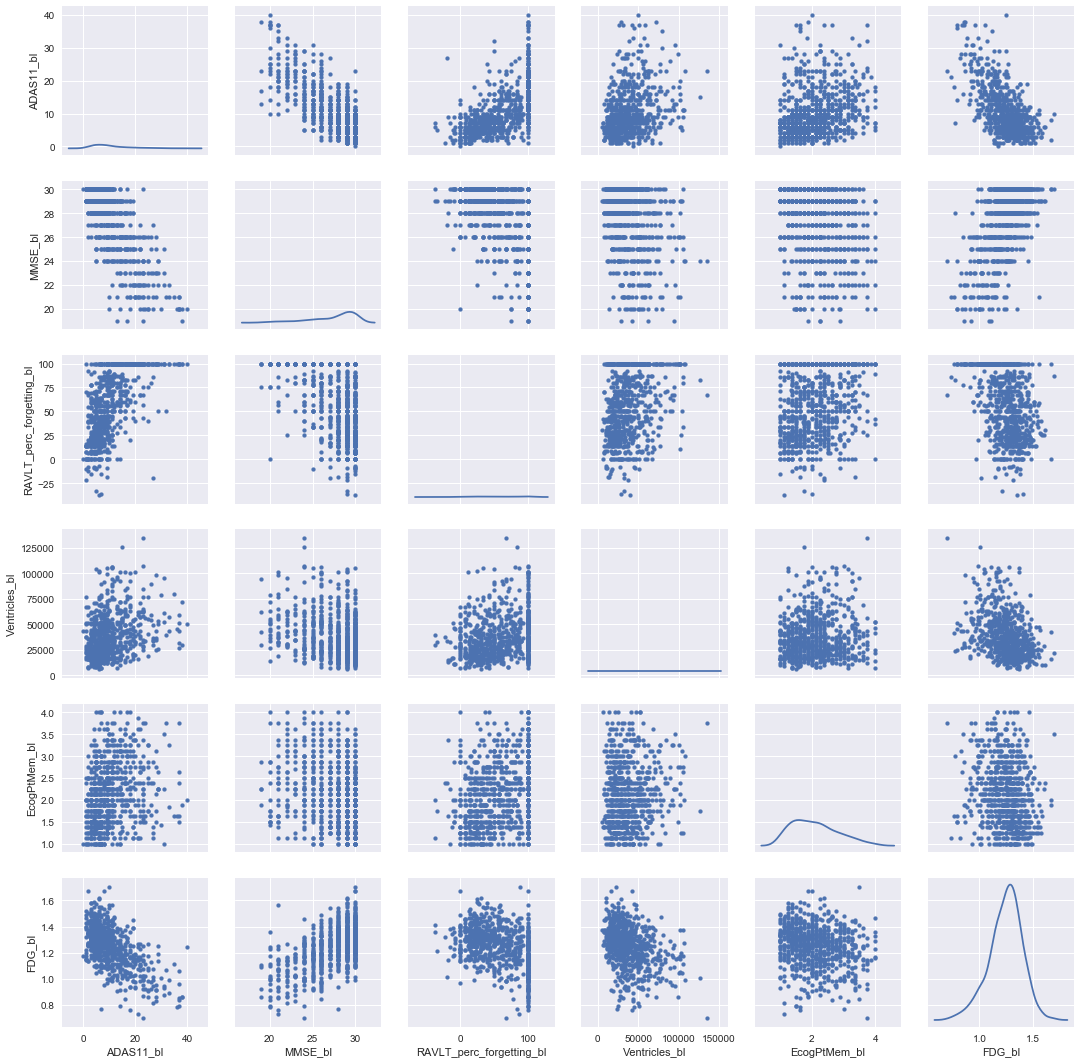

In [16]:
g = sns.PairGrid(df_bl_adni2, vars=['ADAS11_bl','MMSE_bl', 'RAVLT_perc_forgetting_bl', 'Ventricles_bl', 'EcogPtMem_bl', 'FDG_bl'])
g.map_diag(sns.kdeplot)
g.map_offdiag(plt.scatter, s=15)

### Correlation of predictors with DX

- We know that APOE4 is a strong indicator of AD, and a simple bar chart validates that.
- Next we looked at how neuropsychological assessments were correlated to DX. ADAS does very well in detecting AD, MMSE is quite poor performance while RAVLT_forgetting and RAVLT_learning also perform quite well.
- Next we looked at the two PET variables - FDG and AV45 which measure glucose metabolism. FDG shows stronger correlation with SD, AV45 no correlation with any of the DX_bl variables.

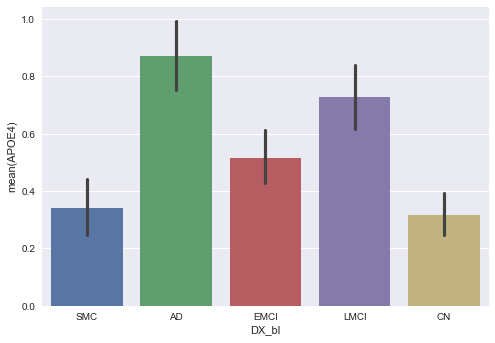

In [17]:
ax = sns.barplot(x="DX_bl", y="APOE4", data=df_bl_adni2)

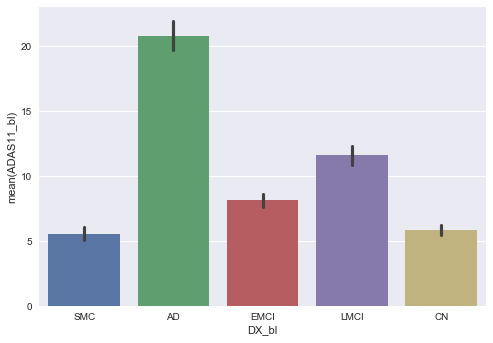

In [18]:
ax = sns.barplot(x="DX_bl", y="ADAS11_bl", data=df_bl_adni2)

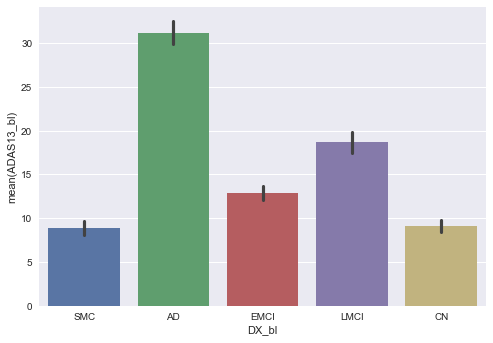

In [19]:
ax = sns.barplot(x="DX_bl", y="ADAS13_bl", data=df_bl_adni2)

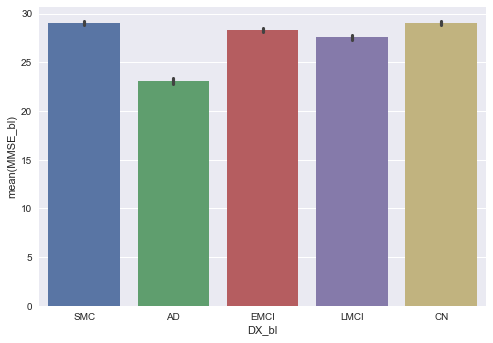

In [20]:
ax = sns.barplot(x="DX_bl", y="MMSE_bl", data=df_bl_adni2)


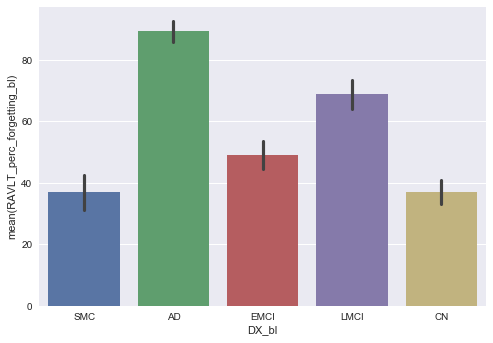

In [21]:
ax = sns.barplot(x="DX_bl", y="RAVLT_perc_forgetting_bl", data=df_bl_adni2)

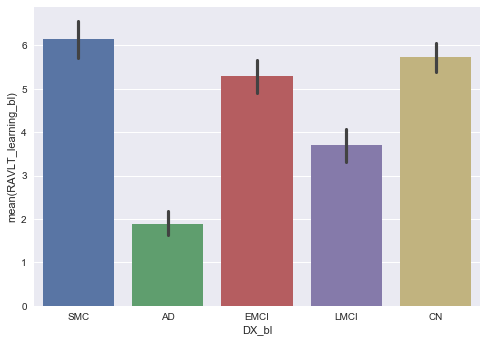

In [22]:
x = sns.barplot(x="DX_bl", y="RAVLT_learning_bl", data=df_bl_adni2)

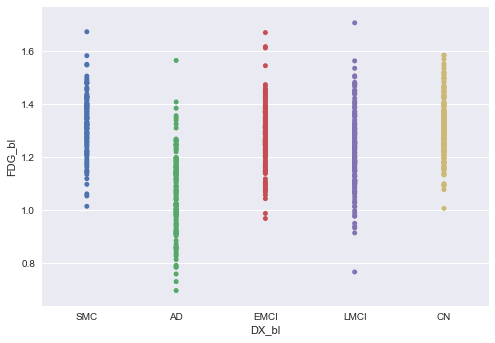

In [23]:
sns.stripplot(x="DX_bl", y="FDG_bl", data=df_bl_adni2);

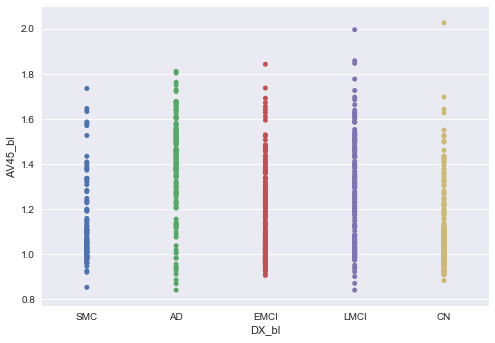

In [24]:
sns.stripplot(x="DX_bl", y="AV45_bl", data=df_bl_adni2);

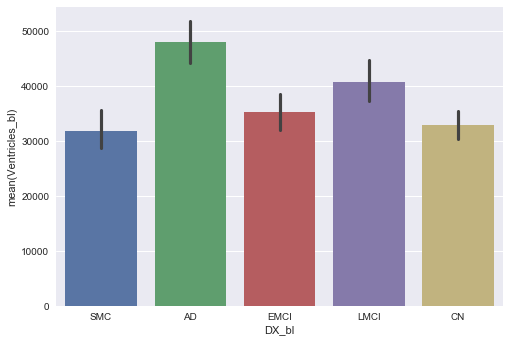

In [25]:
sns.barplot(x="DX_bl", y="Ventricles_bl", data=df_bl_adni2);

### Conclusion: 
There seems to be some correlation with the AD condition, but the other DX conditions shows very noisy correlation - which is why Alzheimer’s in its early phases it very hard to detect. **Our model would seek to make it easier to detect ealier conditions of DX. **
